In [1]:
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy import stats
from matplotlib import pyplot

In [2]:
url = 'https://raw.githubusercontent.com/askipitaris/ML-Trust-Analysis/main/Group3_Dataset.csv'
responses = pd.read_csv(url, index_col=0)
responses.head(5)

,Proctor,Condition,Trust Q_1,Trust Q_2,Trust Q_3,Trust Q_4,Trust Q_5,Trust Q_6,Trust Q_7,Trust Q_8,Overall Trust,Simple Trust,Age,Gender,ML Experience?
Participant ID,,,,,,,,,,,,,,,
PID001,Team,95% accuracy,5,4,4,3,4,5,3,2,3.75,4,19,Male,No
PID002,Team,50% accuracy,4,2,1,1,4,4,3,1,2.50,4,20,Male,No
PID003,Team,50% accuracy,4,4,1,2,3,2,2,4,2.75,4,19,Female,No
PID004,Team,95% accuracy,4,5,3,4,5,4,2,2,3.63,4,19,Female,Yes
PID005,Team,95% accuracy,2,5,1,2,4,3,3,3,2.88,2,21,Female,Yes


In [3]:
responses.rename(columns={"Trust Q_1": "Confidence",
                          "Trust Q_2": "Predictability",
                          "Trust Q_3": "Reliability",
                          "Trust Q_4": "Correctness",
                          "Trust Q_5": "Effeciency",
                          "Trust Q_6": "Wariness",
                          "Trust Q_7": "Outperform Human",
                          "Trust Q_8": "Enjoyment"},
                inplace=True)
responses

,Proctor,Condition,Confidence,Predictability,Reliability,Correctness,Effeciency,Wariness,Outperform Human,Enjoyment,Overall Trust,Simple Trust,Age,Gender,ML Experience?
Participant ID,,,,,,,,,,,,,,,
PID001,Team,95% accuracy,5,4,4,3,4,5,3,2,3.75,4,19,Male,No
PID002,Team,50% accuracy,4,2,1,1,4,4,3,1,2.50,4,20,Male,No
PID003,Team,50% accuracy,4,4,1,2,3,2,2,4,2.75,4,19,Female,No
PID004,Team,95% accuracy,4,5,3,4,5,4,2,2,3.63,4,19,Female,Yes
PID005,Team,95% accuracy,2,5,1,2,4,3,3,3,2.88,2,21,Female,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PID076,Grace Mayer,50% accuracy,4,4,4,4,4,2,2,4,3.50,5,24,Female,No
PID077,Grace Mayer,75% accuracy,5,4,4,3,4,1,2,3,3.25,4,20,Male,No
PID078,Grace Mayer,95% accuracy,5,4,4,5,5,4,4,4,4.38,4,22,Female,No


# Descriptive Statistics for Overall Trust

In [4]:
responses_descriptive = responses.groupby("Condition")["Overall Trust"].agg(["count",
                                                                             "mean",
                                                                             "std",
                                                                             "sem"]).reset_index()
responses_descriptive

,Condition,count,mean,std,sem
0,50% accuracy,20,3.0335,0.656532,0.146805
1,75% accuracy,20,3.5075,0.526327,0.117690
2,95% accuracy,20,3.3210,0.606490,0.135615
3,No accuracy,20,3.4330,0.701353,0.156827


# Visualizations of Data

## Overall Trust

Text(0.5, 1.0, 'Overall Trust of Participants')

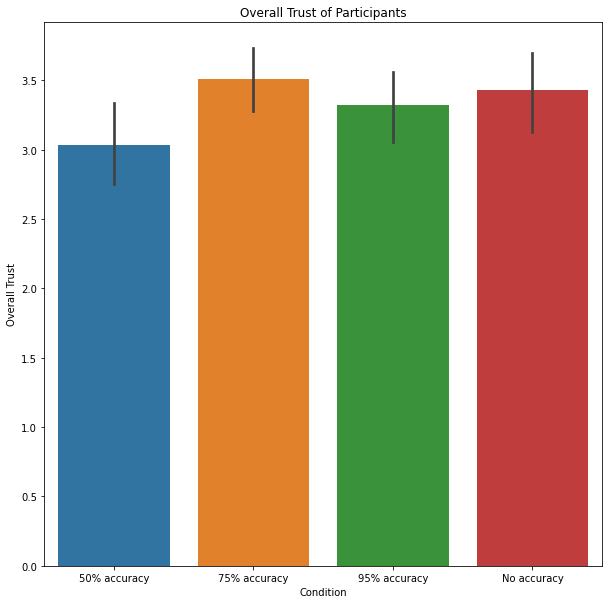

In [5]:
fig, ax = pyplot.subplots(figsize=(10, 10))
(sns.barplot(ax=ax, x="Condition", y="Overall Trust", data=responses.sort_values(by="Condition"))
 .set_title("Overall Trust of Participants"))

## Simple Trust

Text(0.5, 1.0, 'Simple Trust of Participants')

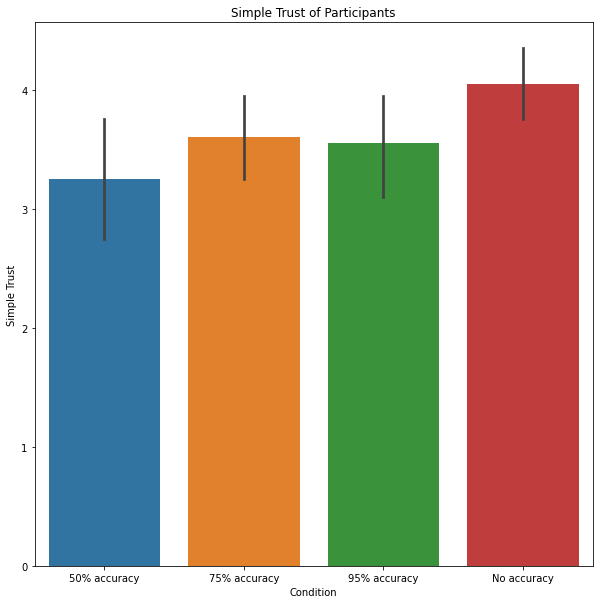

In [6]:
fig, ax = pyplot.subplots(figsize=(10, 10))
(sns.barplot(ax=ax, x="Condition", y="Simple Trust", data=responses.sort_values(by="Condition"))
 .set_title("Simple Trust of Participants"))

## Trust Scale Responses

In [7]:
response_scale = responses.groupby("Condition").mean().drop(["Overall Trust", "Simple Trust", "Age"], axis=1)
response_scale = response_scale.T
response_scale

Condition,50% accuracy,75% accuracy,95% accuracy,No accuracy
Confidence,3.50,4.45,4.00,4.00
Predictability,3.35,4.25,4.10,3.70
Reliability,2.35,3.10,3.00,3.45
Correctness,2.70,3.45,3.05,3.70
Effeciency,3.60,4.20,3.95,4.15
Wariness,3.45,2.80,3.40,2.35
Outperform Human,2.65,2.80,2.35,3.00
Enjoyment,2.65,3.00,2.70,3.10


Text(0.5, 1.0, 'Trust Scale Responses')

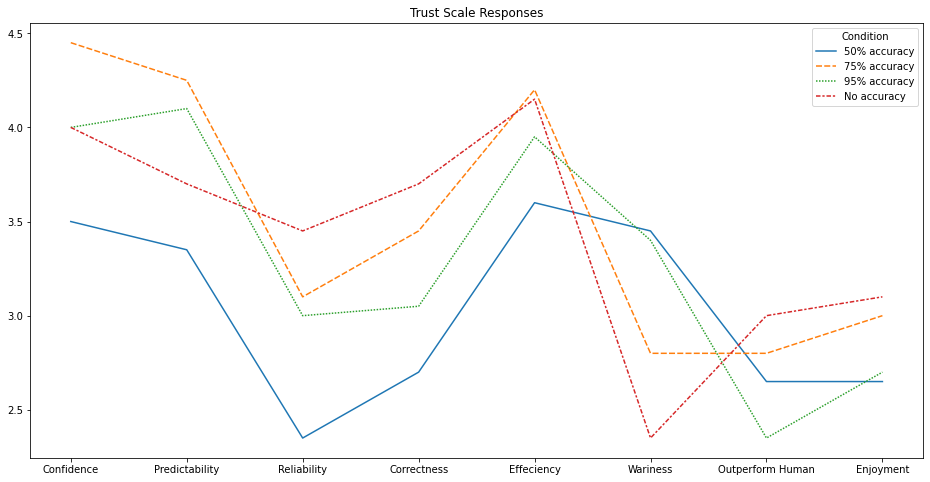

In [8]:
fig, ax = pyplot.subplots(figsize=(16, 8))
(sns.lineplot(ax=ax, data=response_scale)
 .set_title("Trust Scale Responses"))

# Hypothesis Testing

In [9]:
accuracy_50 = responses[responses["Condition"] == "50% accuracy"]
accuracy_75 = responses[responses["Condition"] == "75% accuracy"]
accuracy_95 = responses[responses["Condition"] == "95% accuracy"]
accuracy_none = responses[responses["Condition"] == "No accuracy"]

In [10]:
measures = responses.columns.drop(["Proctor", "Condition", "Age", "Gender", "ML Experience?"])
measures

Index(['Confidence', 'Predictability', 'Reliability', 'Correctness',
       'Effeciency', 'Wariness', 'Outperform Human', 'Enjoyment',
       'Overall Trust', 'Simple Trust'],
      dtype='object')

## Assumptions Check

### Equality of Variance

In [11]:
eov_df = pd.DataFrame(columns=["Measure", "Levene Stat", "Levene p"])
for item in measures:
    lv = stats.levene(accuracy_50[item], accuracy_75[item], accuracy_95[item], accuracy_none[item])
    new_data = pd.DataFrame({"Measure": item, "Levene Stat": lv[0], "Levene p": lv[1]}, index=[0])
    eov_df = eov_df.append(new_data, ignore_index=True)

eov_df

,Measure,Levene Stat,Levene p
0,Confidence,0.436963,0.727186
1,Predictability,1.818039,0.151001
2,Reliability,0.159530,0.923217
3,Correctness,1.017618,0.389678
4,Effeciency,0.826806,0.483162
5,Wariness,0.376504,0.770192
6,Outperform Human,1.086531,0.360017
7,Enjoyment,0.284553,0.836404
8,Overall Trust,0.609209,0.611071
9,Simple Trust,0.860356,0.465474


All of the measures pass the equality of variances check.

### Normality Check

In [12]:
def shapiro_calc(measure, accuracy_df, level):
    """
    Calculates shapiro-wilks for a specific measure with a specific accuracy.

    Parameters
    ----------
    measure : String
        The response parameter that for which the shapiro-wilks test will be run.
    accuracy_df : Dataframe
        The dataframe that has been filtered to have only a specific accuracy. Will
        be used to run shapiro-wilks test.
    level : String
        A string that indicates what level of accuracy this is being run for.

    Returns
    -------
    A new dataframe with the measure name, accuracy level, and the shapiro stat & p-value.
    """
    
    sp = stats.shapiro(accuracy_df[measure])
    return pd.DataFrame({"Measure":measure, "Condition":level, "Shapiro Stat":sp[0], "Shapiro p":sp[1]}, index=[0])

In [13]:
nc_df = pd.DataFrame(columns=["Measure", "Condition", "Shapiro Stat", "Shapiro p"])
for measure in measures:
    nc_df = nc_df.append(shapiro_calc(measure, accuracy_50, "50%"), ignore_index=True)
    nc_df = nc_df.append(shapiro_calc(measure, accuracy_75, "75%"), ignore_index=True)
    nc_df = nc_df.append(shapiro_calc(measure, accuracy_95, "95%"), ignore_index=True)
    nc_df = nc_df.append(shapiro_calc(measure, accuracy_none, "none"), ignore_index=True)

nc_df.set_index(["Measure", "Condition"], inplace=True)
nc_df

Shapiro Stat  Shapiro p
Measure          Condition                         
Confidence       50%            0.605189   0.000003
                 75%            0.677206   0.000021
                 95%            0.753385   0.000189
                 none           0.784838   0.000518
Predictability   50%            0.887092   0.023787
                 75%            0.719977   0.000069
                 95%            0.783970   0.000503
                 none           0.884106   0.020988
Reliability      50%            0.829645   0.002476
                 75%            0.909878   0.063396
                 95%            0.896570   0.035580
                 none           0.904245   0.049567
Correctness      50%            0.911565   0.068270
                 75%            0.803788   0.000985
                 95%            0.882312   0.019475
                 none           0.846414   0.004644
Effeciency       50%            0.863366   0.009002
                 75%            0.800362   0.000875
                 95%            0.864946   0.009588
                 none           0.759466   0.000228
Wariness         50%            0.880073   0.017746
                 75%            0.908938   0.060835
                 95%            0.916647   0.085419
                 none           0.860697   0.008097
Outperform Human 50%            0.877099   0.015696
                 75%            0.871543   0.012508
                 95%            0.886600   0.023300
                 none           0.925443   0.126148
Enjoyment        50%            0.881573   0.018885
                 75%            0.919971   0.098959
                 95%            0.919180   0.095548
                 none           0.911607   0.068395
Overall Trust    50%            0.936601   0.206665
                 75%            0.959882   0.541488
                 95%            0.975670   0.866955
                 none           0.890813   0.027835
Simple Trust     50%            0.791273   0.000642
                 75%            0.743746   0.000140
                 95%            0.798028   0.000808
                 none           0.806570   0.001084

None of the measures fully pass the normality check. The "Overall Trust" measure has one condition that does not pass the normality check; however, the One-Way ANOVA is robust enough to where it can produce accurate results when the normality test does not fully pass.
In this case, only the "Overall Trust" measure gets close enough to where I would have confidence in the One-Way ANOVA, therefore it is the only measure which will be tested.

### One-Way ANOVA

In [14]:
pg.anova(data=responses, dv="Overall Trust", between="Condition", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Condition,2.599045,3,0.866348,2.210382,0.093734,0.08025
1,Within,29.787830,76,0.391945,NaN,NaN,NaN


The p-value is > 0.05 meaning the results are not significant. This indicates that there is no significant difference in a users trust of an ML algorithm based on the stated accuracy.

Post-hoc tests are not required because the results of the one-way ANOVA were not significant.

### Degrees of Freedom

In [15]:
df1 = len(responses_descriptive) - 1
df1

3

In [16]:
df2 = (len(accuracy_50) - 1) + (len(accuracy_75) - 1) + (len(accuracy_95) - 1) + (len(accuracy_none) - 1)
df2

76